[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


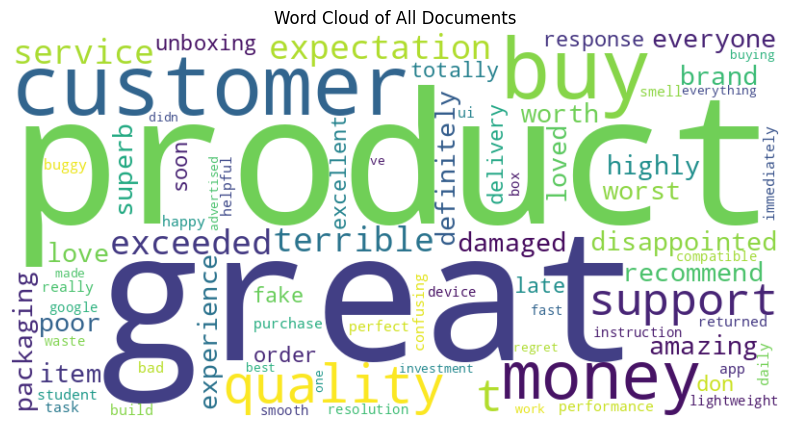


Topic 1:
product buy great support customer

Topic 2:
money quality great buy product

Topic 3:
customer support great buy product


/tmp/ipython-input-2854769686.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


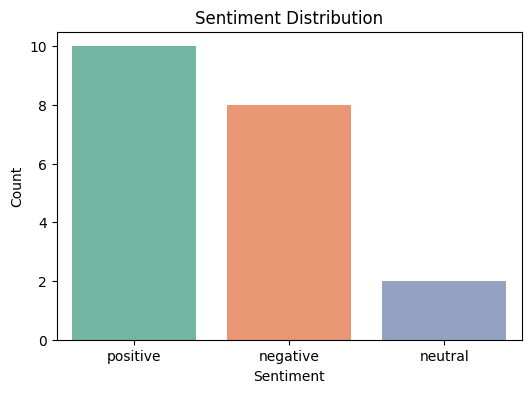


📄 Sample Output:
   doc_id                                               text     label
0       1  The product was great and exceeded my expectat...  positive
1       2      Terrible customer service. Very disappointed.  negative
2       3      I love this brand. Will definitely buy again.  positive
3       4             Not worth the money. Quality was poor.  negative
4       5  Amazing experience! Highly recommend it to eve...  positive
5       6        Worst packaging ever. The item was damaged.  negative
6       7                Superb quality. Loved the unboxing.  positive
7       8        Late delivery and no response from support.  negative
8       9                  Excellent! Will order again soon.  positive
9      10                   Totally fake product. Don’t buy!  negative


In [3]:
# Words to Insights: A Text Mining Pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 1. Create Sample Dataset
data = {
    'doc_id': list(range(1, 21)),
    'text': [
        "The product was great and exceeded my expectations!",
        "Terrible customer service. Very disappointed.",
        "I love this brand. Will definitely buy again.",
        "Not worth the money. Quality was poor.",
        "Amazing experience! Highly recommend it to everyone.",
        "Worst packaging ever. The item was damaged.",
        "Superb quality. Loved the unboxing.",
        "Late delivery and no response from support.",
        "Excellent! Will order again soon.",
        "Totally fake product. Don’t buy!",
        "Great performance and build. Happy with the purchase.",
        "Very bad smell. Returned the product immediately.",
        "This app is really helpful for students.",
        "The UI is confusing and buggy.",
        "Perfect for daily tasks. Lightweight and smooth.",
        "Not compatible with my device. Waste of money.",
        "Great customer support and fast resolution.",
        "No instructions in the box. Had to Google everything.",
        "One of the best investments I’ve made.",
        "Regret buying this. Didn’t work as advertised."
    ]
}
df = pd.DataFrame(data)

# 2. Preprocessing Function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

# Apply cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

# 3. Word Cloud
text_blob = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Documents")
plt.show()

# 4. Topic Modeling (LDA)
count_vect = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = count_vect.fit_transform(df['cleaned_text'])
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(dtm)

# Show topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, count_vect.get_feature_names_out(), 5)

# 5. Sentiment Analysis
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Sentiment distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 6. Output Sample
print("\n📄 Sample Output:")
print(df[['doc_id', 'text', 'label']].head(10))
